# Pre-trained model usage

all files needed can be found in https://ml-challenge.mercadolibre.com/workshop

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.text import * 
from fastai.callbacks import *
from sklearn.model_selection import train_test_split
from pathlib import Path
import pickle as pkl
import pandas as pd
ROOT_PATH = '/content/drive/My Drive/Meli-Challenge/'

In [0]:
df = pd.read_csv(ROOT_PATH + 'full_reliable_data.csv')

In [0]:
df.pop('Unnamed: 0');
print(df.columns)
print(df.shape)

Index(['title', 'label_quality', 'language', 'category', 'parsed_title',
       'encoded_category'],
      dtype='object')
(2386304, 6)


In [0]:
df = df[~df.parsed_title.isna() & (df.parsed_title != 'nan') & (df.parsed_title != '') & (~df.parsed_title.isnull())]
df.to_csv(ROOT_PATH + 'full_reliable_data.csv')
# X, y = df['parsed_title'], df['category']

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
# importamos el language model databunch
# data_lm = load_data(ROOT_PATH + 'pre-trained/', 'data_lm_export.pkl')
data_lm = TextLMDataBunch.from_csv(
        ROOT_PATH, 'full_reliable_data.csv', text_cols='parsed_title', label_cols='category', 
        valid_pct=0.05, max_vocab=100000, bs=64
    )

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.05, pretrained=False)

Finding learning rate...


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-03
Min loss divided by 10: 1.74E-02


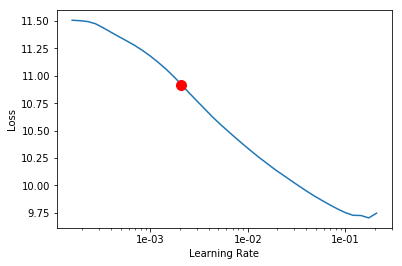

In [0]:
print('Finding learning rate...')
learn.lr_find()
learn.recorder.plot(skip_end=20, skip_start=40, suggestion=True)

In [0]:
learn.fit_one_cycle(
    10, 1.74e-2, callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='lm')]
)

epoch,train_loss,valid_loss,accuracy,time
0,4.873209,4.826450,0.269060,46:03
1,4.869054,4.830443,0.264728,46:18
2,4.839977,4.789506,0.268704,46:17
3,4.741889,4.688645,0.277533,46:15
4,4.602772,4.577544,0.286371,46:08
5,4.468689,4.455299,0.297335,46:10
6,4.324526,4.322448,0.310849,46:08
7,4.146078,4.197100,0.324756,46:10


KeyboardInterrupt: ignored

In [0]:
learn.save_encoder('lm_enc')

In [0]:
learn.save('lm1')

## Classification

In [0]:
data_clas = load_data(ROOT_PATH + 'pre-trained', 'data_clas_export.pkl')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [0]:
data_clas.show_batch(rows=3)

text,target
xxbos cooler para acer aspire e5 - 571 e5 - 571 g e5 - xxunk e5 - xxunk e5 - 511 e5 - 511 g e5 - xxunk e5 - 521 e5 - 521 g e5 - 531 e5 - 551 e5 - 551 g v3 - 5,DESKTOP_COMPUTER_COOLERS_AND_FANS
xxbos maquina vid - gol / par / sav 98 / 08 - 4p - eletr p / mot bosch - diant - dir,AUTOMOTIVE_POWER_WINDOW_REGULATORS
xxbos luva para protecao palmar caleira profissional kit com 15 pares de luvas academia crossfit cor cinza reforcada - oferta,GYM_GLOVES


## Classifier training

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.05 * 1, bptt=12, path=ROOT_PATH)

In [0]:
learn.load_encoder('lm_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (15999998 items)
x: TextList
xxbos gorro under armour running mens perf lifestyle dad hombre gr,xxbos powerpro hi- vis yellow xxunk 100 lb / 300 yd # xxunk,xxbos diafragma membrana carb solex simples fusca 1.3 gas 74 a 83,xxbos excelente jarra royal doulton the xxunk muneco de nieve 5,xxbos carenagem completa xtz adesivada + bloco otico
y: CategoryList
HATS_AND_CAPS,FISHING_LINES,CAR_CARBURETORS,DRINK_PITCHERS,MOTORCYCLE_FAIRINGS
Path: ensalada2;

Valid: LabelList (4000000 items)
x: TextList
xxbos hp internal hard drive xxunk 160 gb xxunk pedido 30dias !,xxbos placa de audio profecional . audio xxunk,xxbos candado bronce llaves seguridad porton reja max resistencia,xxbos antiguo porta retrato art nouveau en bronce,xxbos sillones un cuerpo rebajado ! !
y: CategoryList
PC_KEYBOARDS,AUDIO_INTERFACES,PADLOCKS,PICTURE_FRAMES,SOFAS
Path: ensalada2;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (e

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 1.00E-02


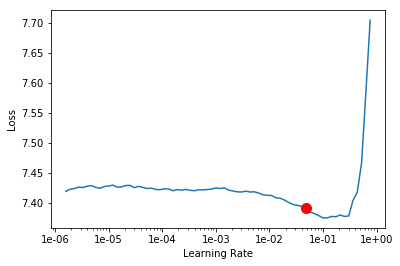

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=10, skip_start=15, suggestion=True)

In [0]:
learn.fit_one_cycle(1, 7e-2)

In [0]:
learn.save('class_fit_head')

Problemas por la carga de los archivos (Muy pesados). La ram se sobre carga y falla el proceso
